In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

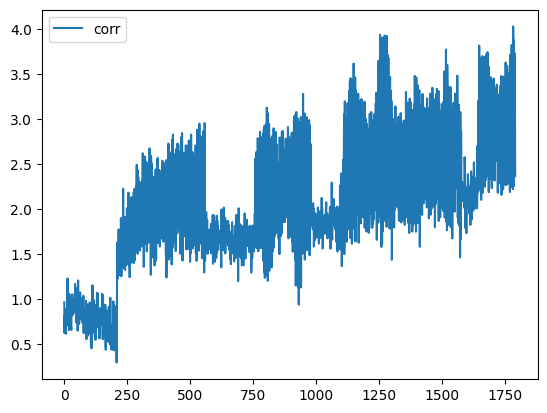

In [105]:
#import csv virtual_photodiodes.csv with numpy
data = np.genfromtxt('virtual_photodiodes_10Hz_IRbandpass850_laser1point_30fps_3ondisc.raw.csv', delimiter=',', skip_header=1)

topleft = data[0:,1]
topcenter = data[0:,2]
topright = data[0:,3]

#time derivatives
topleft_diff = np.diff(topleft, n=1)
topcenter_diff = np.diff(topcenter, n=1)
topright_diff = np.diff(topright, n=1)

#cross correlation of differences
ccorr = np.correlate(topleft_diff, topcenter_diff, mode='same')

total_avg = (topleft + topright + topcenter) / 3
topleft -= total_avg
topcenter -= total_avg
topright -= total_avg

corr = []
for i in range(len(total_avg)):
    d1 = topleft[i] - topcenter[i]
    d2 = topright[i] - topcenter[i]
    d3 = topleft[i] - topright[i]

    corr.append(d1 + d2 + d3)
    
corr = np.array(corr)
plt.plot(corr)
#legend
plt.legend(['corr', 'topleft', 'topcenter', 'topright'])

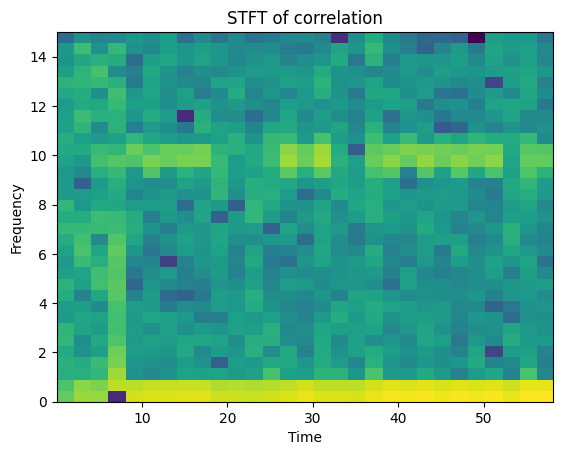

In [111]:
#plot stft
plt.figure()
#corr to log scale
corr = np.log(np.abs(corr))
plt.specgram(corr, NFFT=64, Fs=30, noverlap=4)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('STFT of correlation')
plt.show()